In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir(r'C:\Users\palla\Documents\Skill\ML-Projects\Credit-Card-Segmentation-master\Credit-Card-Segmentation-master')
df = pd.read_csv('CreditCard.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There is one missing value in credit_limit and 313 missing values in minimum payments.
Let's impute the missing credit limit value, minimum payments values with the median value of the respective columns.

In [8]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)

In [10]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

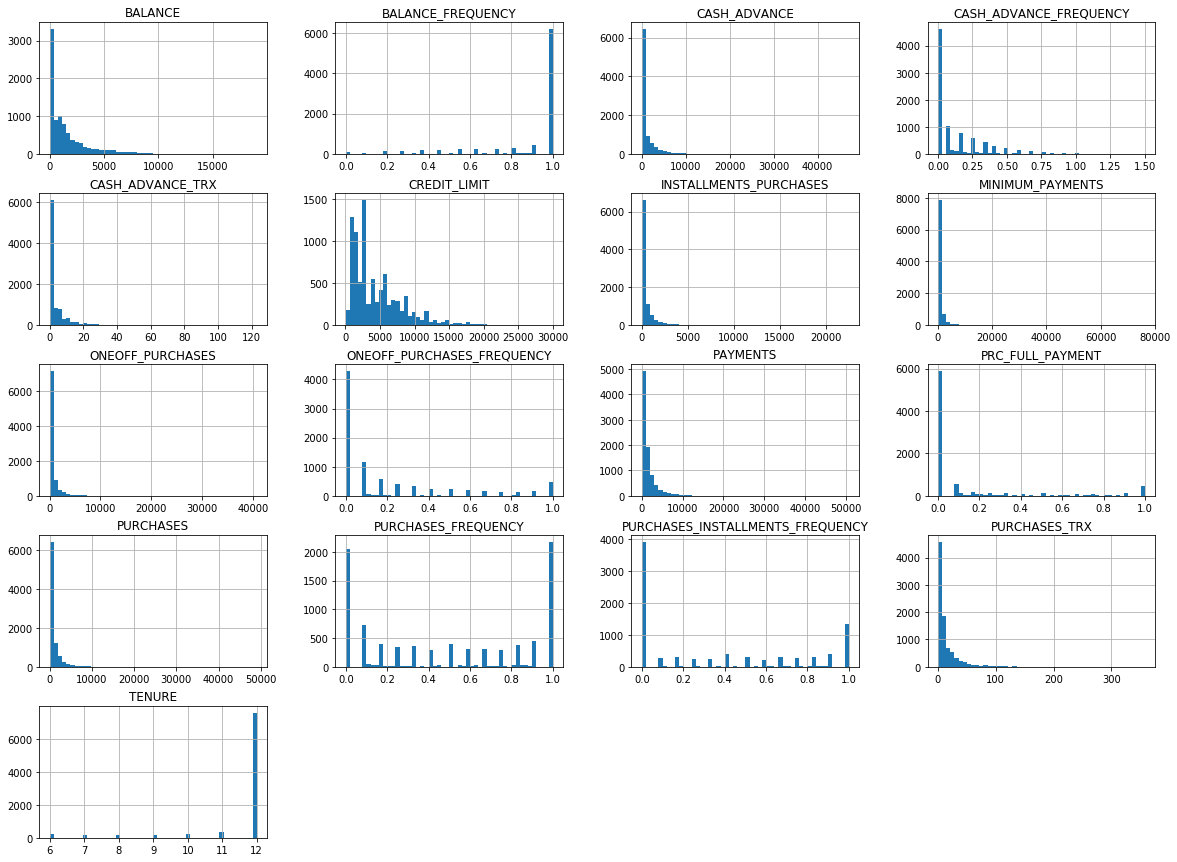

In [11]:
df.hist(bins=50,figsize=(20,15))
plt.savefig("Plots")
plt.show()

#Creating new variables
Monthly Average Purchase 
Monthly Cash Advance

In [12]:
df['MonthlyAvgPurchase'] = df['PURCHASES']/df['TENURE']
df['MonthlyCashAdvance'] = df['CASH_ADVANCE']/df['TENURE']

In [13]:
df['MonthlyAvgPurchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: MonthlyAvgPurchase, dtype: float64

In [14]:
df['MonthlyCashAdvance'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: MonthlyCashAdvance, dtype: float64

In [15]:
df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].head(10)

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
5,0.00,1333.28
6,6402.63,688.38
7,0.00,436.20
8,661.49,200.00
9,1281.60,0.00


#Purchase Behaviors
There are four types of purchase behaviors 
1. People who do both purchases
2. People who do only oneoff purchases
3. People who do only installment purchases 
4. People who do none of the purchases

In [16]:
def purchase(df):
    if((df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)):
        return 'none'
    if((df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)):
        return 'oneoff'
    if((df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)):
        return 'installment'
    if((df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)):
        return 'both'

In [17]:
df['Purchase_Type'] = df.apply(purchase,axis=1)

#Credit Utilization Rate 
The amount of money that you owe compared to the total amount of credit you have access to. 
Experts generally agree that you should keep your credit utilization rate below 30% whenever possible.
Lower value implies cutomers are maintaing thier balance properly. Lower value means good credit score. 

In [18]:
df['Credit_Utilization_Rate'] = df.apply(lambda x : x['BALANCE']/x['CREDIT_LIMIT'],axis=1)

In [19]:
df['Credit_Utilization_Rate'].head()

0    0.040901
1    0.457495
2    0.332687
3    0.222223
4    0.681429
Name: Credit_Utilization_Rate, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

#Insights from newly created variables

In [21]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MonthlyAvgPurchase,MonthlyCashAdvance,Purchase_Type,Credit_Utilization_Rate
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,oneoff,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff,0.681429


In [22]:
df['Purchase_Type'].value_counts()

both           2774
installment    2260
none           2042
oneoff         1874
Name: Purchase_Type, dtype: int64

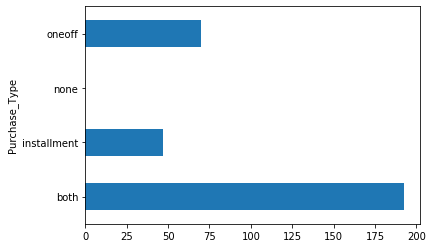

In [23]:
df.groupby('Purchase_Type').apply(lambda x : np.mean(x['MonthlyAvgPurchase'])).plot.barh()

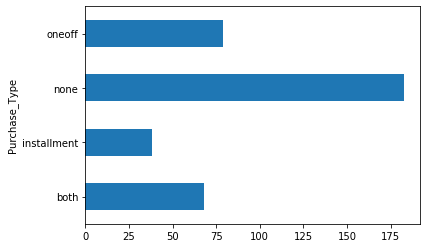

In [24]:
df.groupby('Purchase_Type').apply(lambda x : np.mean(x['MonthlyCashAdvance'])).plot.barh()

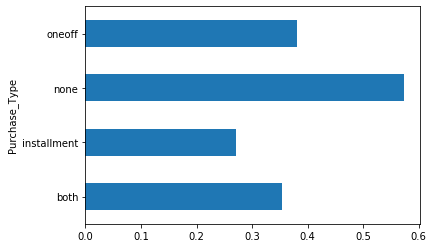

In [25]:
df.groupby('Purchase_Type').apply(lambda x : np.mean(x['Credit_Utilization_Rate'])).plot.barh()

#Pre-processing
Handling Missing Values(Already done)
Handling Outliers 
Check the data types and Create dummy variables/Encode Categorical Data
Drop unnecessary columns 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 22 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

Customer Id and Purchase Type are the only columns with data type 'Object'. Let us drop customer_id since we do not get any insight from it. Also check if there are any duplicate rows.

In [30]:
df.duplicated().sum()

0

In [32]:
df.drop('CUST_ID',axis=1,inplace=True)

In [33]:
pd.get_dummies(df['Purchase_Type']).head()

,both,installment,none,oneoff
0,0,1,0,0
1,0,0,1,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [38]:
df_new=pd.concat([df,pd.get_dummies(df['Purchase_Type'])],axis=1)

In [39]:
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MonthlyAvgPurchase,MonthlyCashAdvance,Purchase_Type,Credit_Utilization_Rate,both,installment,none,oneoff
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,installment,0.040901,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,none,0.457495,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,oneoff,0.332687,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,oneoff,0.222223,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,oneoff,0.681429,0,0,0,1


In [40]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 25 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

In [41]:
df_new.drop('Purchase_Type',axis=1,inplace=True)

#Observe the correlation

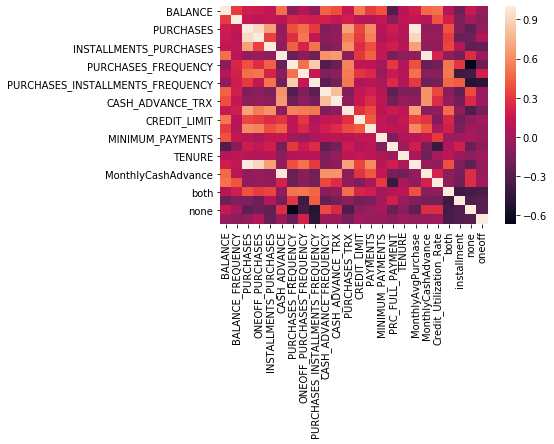

In [46]:
sns.heatmap(df_new.corr())

In [51]:
(df_new.corr() > 0.5) 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MonthlyAvgPurchase,MonthlyCashAdvance,Credit_Utilization_Rate,both,installment,none,oneoff
BALANCE,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
BALANCE_FREQUENCY,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PURCHASES,False,False,True,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
ONEOFF_PURCHASES,False,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
INSTALLMENTS_PURCHASES,False,False,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
CASH_ADVANCE,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
PURCHASES_FREQUENCY,False,False,False,False,False,False,True,True,True,False,...,False,False,False,False,False,False,True,False,False,False
ONEOFF_PURCHASES_FREQUENCY,False,False,False,True,False,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
PURCHASES_INSTALLMENTS_FREQUENCY,False,False,False,False,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE_FREQUENCY,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [52]:
(df_new.corr() < -0.5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,MonthlyAvgPurchase,MonthlyCashAdvance,Credit_Utilization_Rate,both,installment,none,oneoff
BALANCE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BALANCE_FREQUENCY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PURCHASES,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ONEOFF_PURCHASES,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
INSTALLMENTS_PURCHASES,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PURCHASES_FREQUENCY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
ONEOFF_PURCHASES_FREQUENCY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PURCHASES_INSTALLMENTS_FREQUENCY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
CASH_ADVANCE_FREQUENCY,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Standardize the data before applying PCA to avoid effect of scale on the result.

In [54]:
#Standardizing Data
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
df_scaled = SC.fit_transform(df_new)

In [ ]:
# Apply Princiapl component analysis

In [58]:
from sklearn.decomposition import PCA
var_ratio = {}
for n in range(4,15):
    pc=PCA(n_components=n)
    df_pca = pc.fit(df_scaled)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

In [59]:
var_ratio

{4: 0.609131600759802,
 5: 0.6702037292985636,
 6: 0.7228272618704412,
 7: 0.7683757518480034,
 8: 0.80551413971915,
 9: 0.8378231524281577,
 10: 0.8677894976319245,
 11: 0.8931496703866038,
 12: 0.9163708550610841,
 13: 0.9342393686621816,
 14: 0.9520778400678676}

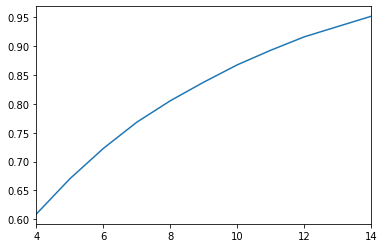

In [60]:
pd.Series(var_ratio).plot()

Since 8 components explain 80% variance, we keep 8 Principal components

In [97]:
pc_final=PCA(n_components =8).fit(df_scaled)
df_after_pca = pc_final.fit_transform(df_scaled)

In [98]:
dd = pd.DataFrame(df_after_pca)

In [99]:
dd.head()

,0,1,2,3,4,5,6,7
0,-1.406873,-2.003477,-0.273107,-0.471284,0.880587,0.388223,-0.112171,-0.471535
1,-2.172659,3.211444,-0.231900,-1.368551,0.359844,-0.471859,-1.256488,-0.059933
2,0.720759,-0.362250,2.094548,1.245791,-1.705520,1.839912,-0.093802,-0.055359
3,-0.777460,-0.331285,2.449649,-0.252306,0.213396,1.368645,-0.413911,0.300717
4,-1.658496,-0.829784,1.712814,1.225829,0.014301,1.055626,0.498407,-0.780732


In [100]:
dd.shape

(8950, 8)

In [101]:
col_list = df_new.columns

In [102]:
col_list

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'MonthlyAvgPurchase', 'MonthlyCashAdvance',
       'Credit_Utilization_Rate', 'both', 'installment', 'none', 'oneoff'],
      dtype='object')

In [103]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(8)])

PC_0    0.252476
PC_1    0.191559
PC_2    0.090672
PC_3    0.074424
PC_4    0.061072
PC_5    0.052624
PC_6    0.045549
PC_7    0.037138
dtype: float64

In [104]:
type(dd)

pandas.core.frame.DataFrame

In [105]:
type(pc_final)

sklearn.decomposition.pca.PCA

In [106]:
# Clustering

In [107]:
from sklearn.cluster import KMeans
km_4 = KMeans(n_clusters=4,random_state=123)
km_4.fit(dd)
km_4.labels_

array([0, 2, 3, ..., 0, 3, 3])

In [108]:
pd.Series(km_4.labels_).value_counts()

3    3662
0    2341
1    1987
2     960
dtype: int64

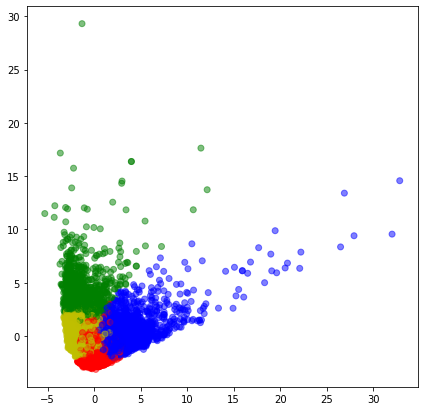

In [109]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in km_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(df_after_pca[:,0],df_after_pca[:,1],c=label_color,cmap='Spectral',alpha=0.5)